In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve
# !pip install imblearn
import imblearn as im

plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'podaci\baseballnn.csv')
df.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980,7,1
1,13,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985,4,0
2,13,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974,4,0
3,14,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955,5,0
4,17,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number_seasons   1340 non-null   int64  
 1   Games_played     1340 non-null   float64
 2   At_bats          1340 non-null   float64
 3   Runs             1340 non-null   float64
 4   Hits             1340 non-null   float64
 5   Doubles          1340 non-null   float64
 6   Triples          1340 non-null   float64
 7   Home_runs        1340 non-null   float64
 8   RBIs             1340 non-null   float64
 9   Walks            1340 non-null   float64
 10  Strikeouts       1340 non-null   float64
 11  Batting_average  1340 non-null   float64
 12  On_base_pct      1340 non-null   float64
 13  Slugging_pct     1340 non-null   float64
 14  Fielding_ave     1340 non-null   float64
 15  Position         1340 non-null   int64  
 16  Hall_of_Fame     1340 non-null   int64  
dtypes: float64(14)

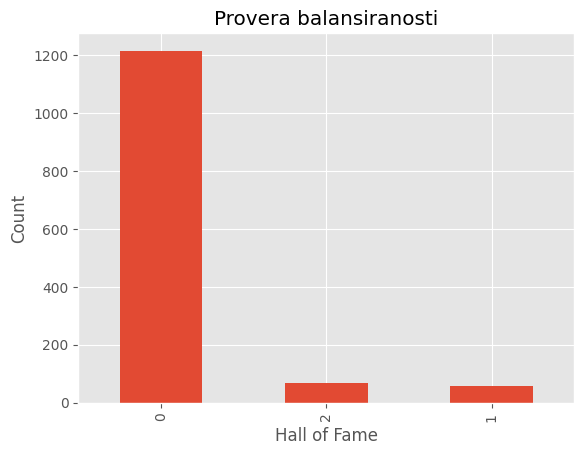

In [4]:
ax = df['Hall_of_Fame'].value_counts().plot(kind='bar', title='Provera balansiranosti')

ax.set_xlabel('Hall of Fame')
ax.set_ylabel('Count')

plt.show()

In [5]:
Y = df['Hall_of_Fame']
X = df.drop({'Hall_of_Fame'}, axis=1)
feature_names = X.columns
X.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980,7
1,13,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985,4
2,13,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974,4
3,14,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955,5
4,17,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994,3


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [7]:
# !pip install termcolor
# !pip install termcolor
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '2', '1'], index=['0', '2', '1']))
    print("---------------------------------------------------------------------------------")


In [8]:
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled

In [9]:
def visualize(X, X_resampled, Y, Y_resampled):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = []
        for y in Y_stacked[i]:
            if y == 0:
                colors.append('r')
            elif y == 1:
                colors.append('b')
            else:
                colors.append('g')
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()

In [10]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    model = RandomForestClassifier(n_estimators=2)
    model.fit(X_train, Y_train)
    report_imbalanced(model, X_train, Y_train, "training")
    report_imbalanced(model, X_test, Y_test, "test")
    return model

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10, random_state=42)

Number of instances before resampling with SMOTE : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with SMOTE : dict_items([(0, 911), (1, 911), (2, 911)]). 


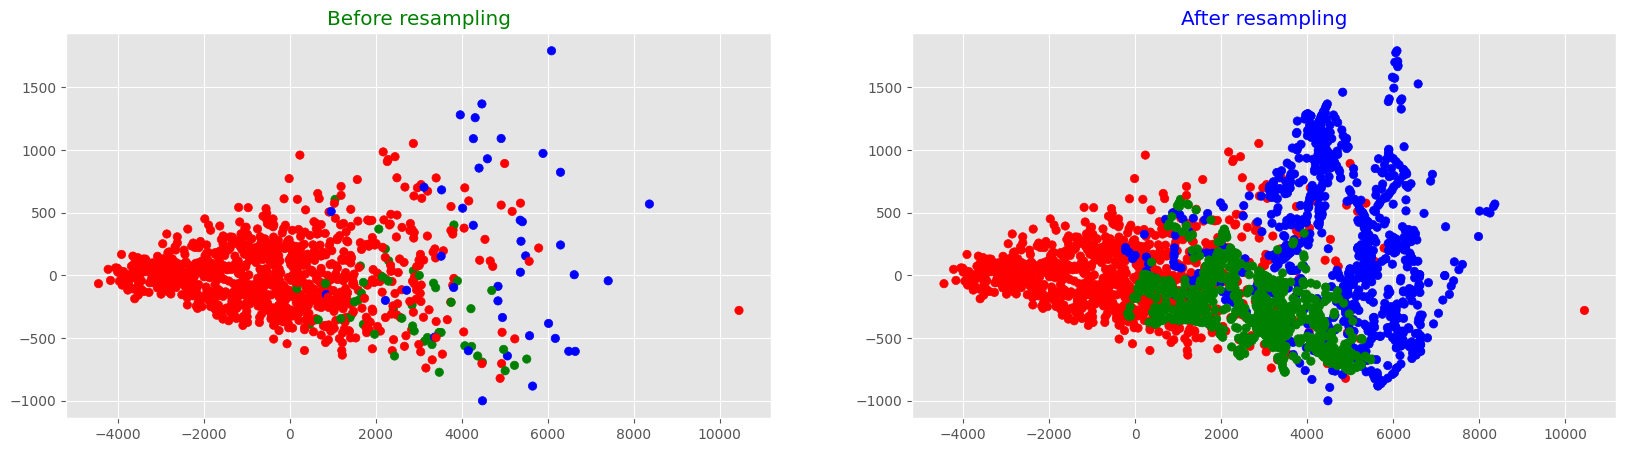

In [12]:
X_resampled, y_resampled = resample(smote, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)

In [37]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.99      0.97      0.97      0.98      0.96       911
          1       0.98      0.99      0.99      0.98      0.99      0.98       911
          2       0.99      0.93      1.00      0.96      0.96      0.92       911

avg / total       0.97      0.97      0.98      0.97      0.98      0.95      2733

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0    2    1
0  902    3    6
2    6  903    2
1   47   18  846
---------------------------------------------------------------------------------
Classification report for model RandomForestCl

In [38]:
from imblearn.under_sampling import NearMiss

Number of instances before resampling with NearMiss : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with NearMiss : dict_items([(0, 43), (1, 43), (2, 43)]). 


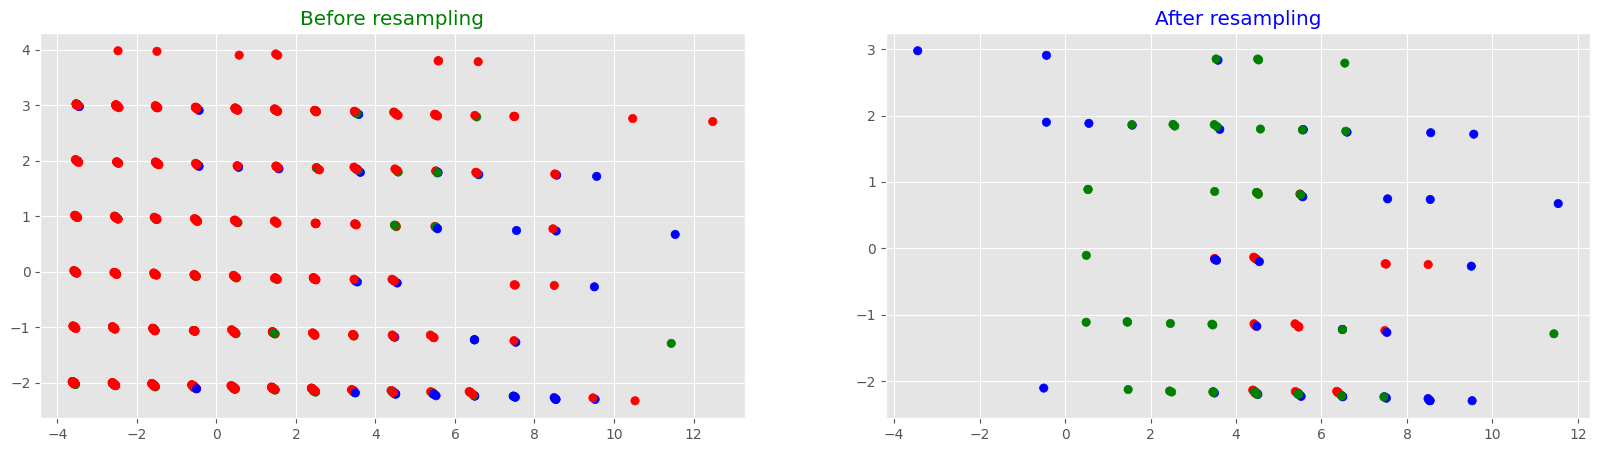

In [39]:
nm1 = NearMiss(version=1, n_neighbors=20)
X_resampled, y_resampled = resample(nm1, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)

In [41]:
model_nm1 = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.98      0.83      0.84      0.90      0.82        43
          1       0.83      0.93      0.91      0.88      0.92      0.85        43
          2       0.96      0.53      0.99      0.69      0.73      0.50        43

avg / total       0.84      0.81      0.91      0.80      0.85      0.72       129

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
    0   2   1
0  42   0   1
2   3  40   0
1  12   8  23
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on 

Number of instances before resampling with NearMiss : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with NearMiss : dict_items([(0, 43), (1, 43), (2, 43)]). 


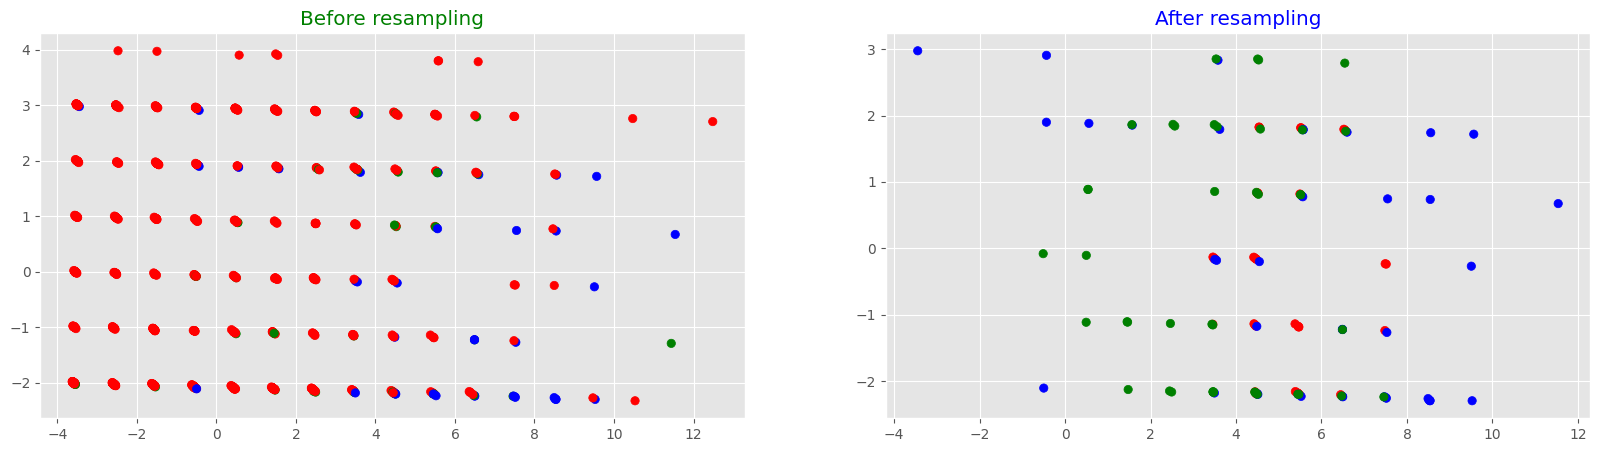

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.95      0.88      0.87      0.92      0.85        43
          1       0.84      0.88      0.92      0.86      0.90      0.81        43
          2       0.91      0.70      0.97      0.79      0.82      0.66        43

avg / total       0.85      0.84      0.92      0.84      0.88      0.77       129

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
    0   2   1
0  41   1   1
2   3  38   2
1   7   6  30
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on 

In [42]:
nm2 = NearMiss(version=2, n_neighbors=20)
X_resampled, y_resampled = resample(nm2, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)
model_nm2 = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

C:\Users\Relja\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Number of instances before resampling with NearMiss : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with NearMiss : dict_items([(0, 43), (1, 43), (2, 36)]). 


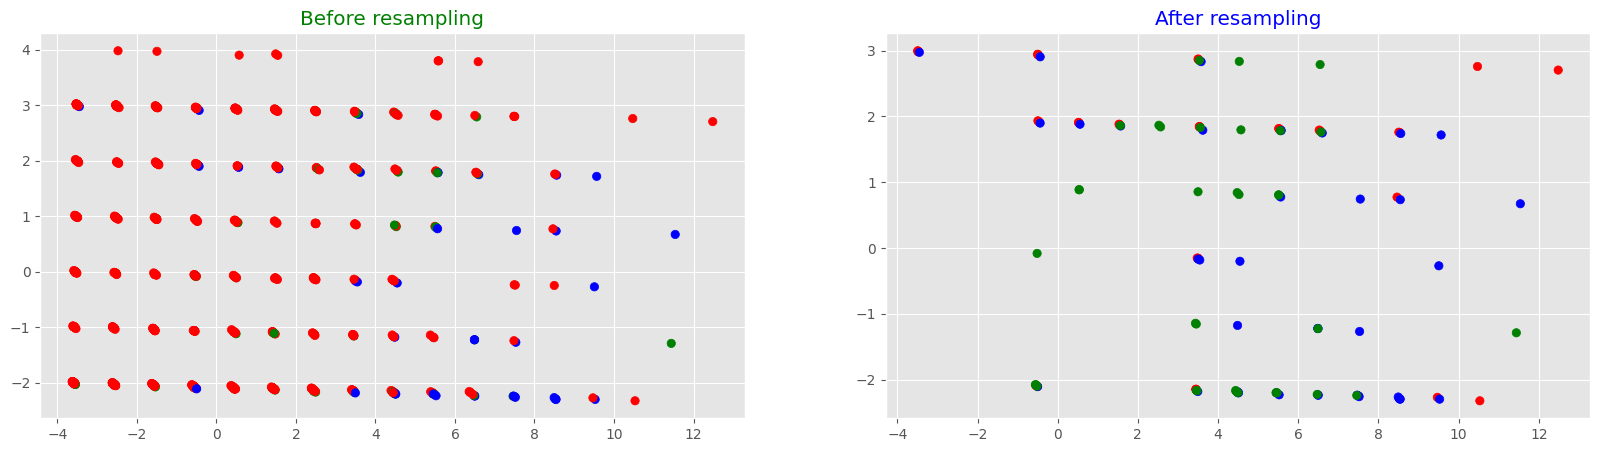

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.75      1.00      0.82      0.86      0.91      0.84        43
          1       0.92      0.77      0.96      0.84      0.86      0.72        43
          2       0.97      0.78      0.99      0.86      0.88      0.75        36

avg / total       0.87      0.85      0.92      0.85      0.88      0.77       122

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
    0   2   1
0  43   0   0
2   9  33   1
1   5   3  28
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on 

In [43]:
nm3 = NearMiss(version=3, n_neighbors=20)
X_resampled, y_resampled = resample(nm3, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)
model_nm3 = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

Number of instances before resampling with CondensedNearestNeighbour : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with CondensedNearestNeighbour : dict_items([(0, 48), (1, 43), (2, 51)]). 


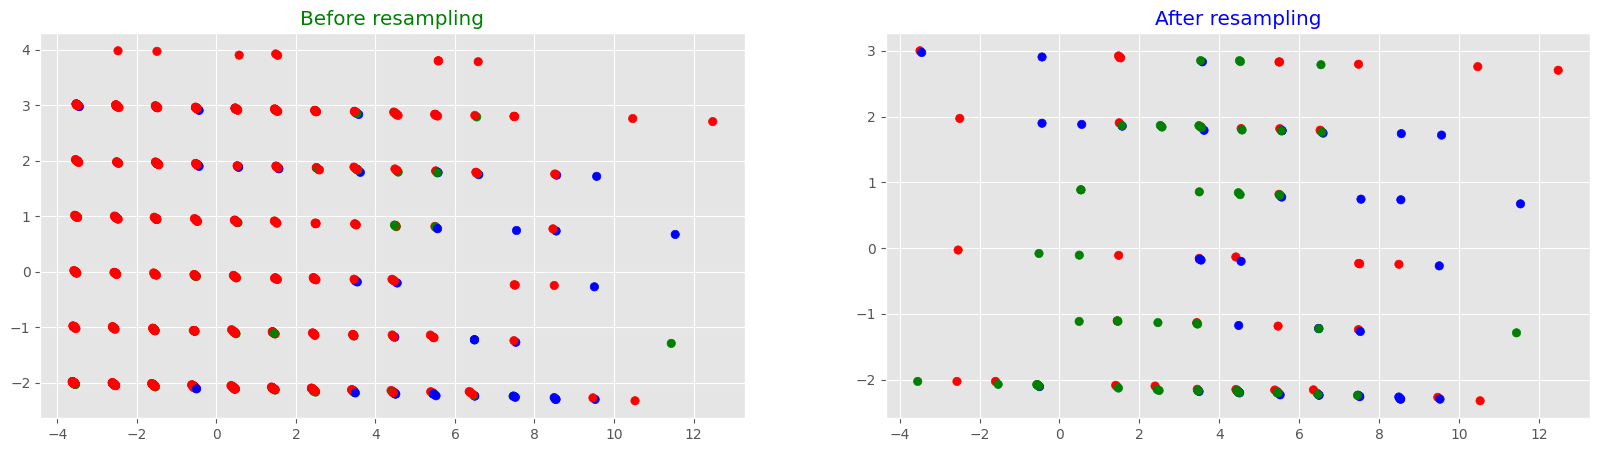

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.98      0.88      0.89      0.93      0.87        48
          1       0.86      0.86      0.94      0.86      0.90      0.80        43
          2       0.98      0.78      0.99      0.87      0.88      0.76        51

avg / total       0.88      0.87      0.94      0.87      0.90      0.81       142

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
    0   2   1
0  47   1   0
2   5  37   1
1   6   5  40
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on 

In [46]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=0, n_neighbors=10, sampling_strategy='majority')
X_resampled, y_resampled = resample(cnn, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)

model_cnn = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

Number of instances before resampling with SMOTEENN : dict_items([(0, 911), (1, 43), (2, 51)]). 
Number of instances after  resampling with SMOTEENN : dict_items([(0, 799), (1, 866), (2, 883)]). 


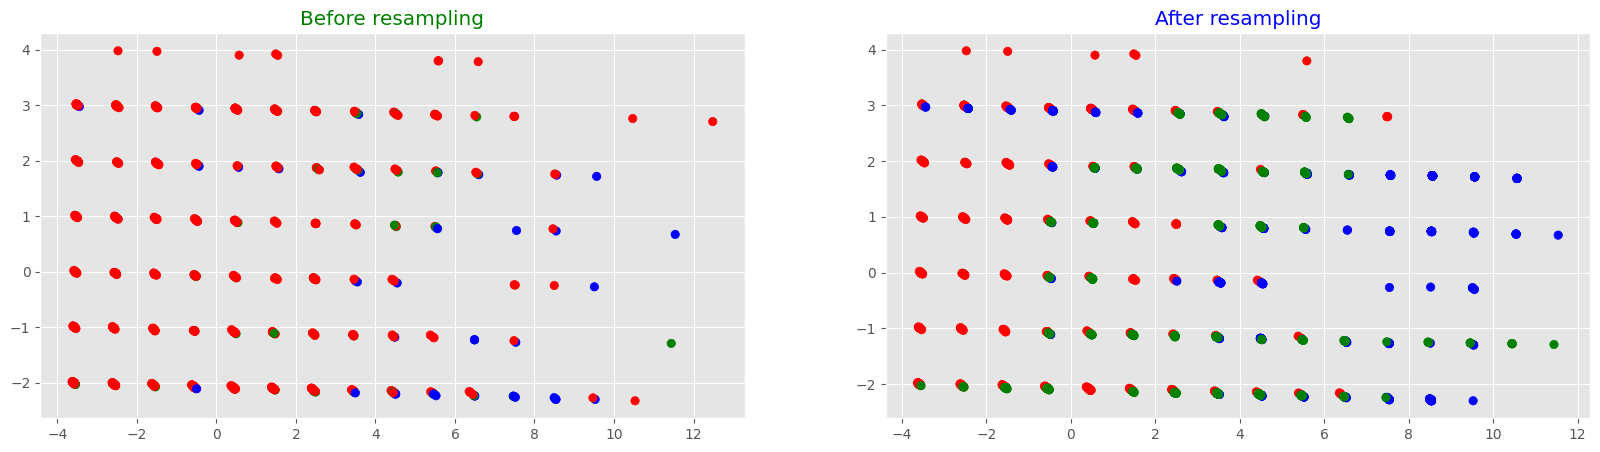

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.98      0.97      0.99      0.98       799
          1       0.98      1.00      0.99      0.99      0.99      0.99       866
          2       1.00      0.94      1.00      0.97      0.97      0.93       883

avg / total       0.98      0.98      0.99      0.98      0.98      0.96      2548

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0    2    1
0  797    0    2
2    4  862    0
1   37   17  829
---------------------------------------------------------------------------------
Classification report for model RandomForestCl

In [48]:
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
smoteenn = SMOTEENN(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = resample(smoteenn, X_train, Y_train)
visualize(X_train, X_resampled, Y_train, y_resampled)

model_smoteenn = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test)

In [49]:
from sklearn.utils.parallel import delayed
from sklearn.utils.parallel import Parallel
from imblearn.ensemble import BalancedRandomForestClassifier

model_ens = BalancedRandomForestClassifier(max_depth=6, random_state=42, max_samples=20)

In [50]:
model_ens.fit(X_train, Y_train)

C:\Users\Relja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Relja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\Relja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\U

BalancedRandomForestClassifier(max_depth=6, max_samples=20, random_state=42)

In [51]:
report_imbalanced(model_ens, X_train, Y_train, "training")
report_imbalanced(model_ens, X_test, Y_test, "test")

Classification report for model BalancedRandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.82      0.95      0.90      0.88      0.77       911
          1       0.62      0.88      0.98      0.73      0.93      0.85        43
          2       0.22      0.82      0.84      0.35      0.83      0.69        51

avg / total       0.94      0.82      0.94      0.86      0.88      0.77      1005

---------------------------------------------------------------------------------
Confusion matrix for model BalancedRandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0   2    1
0  748  18  145
2    1  38    4
1    4   5   42
---------------------------------------------------------------------------------
Classification report for model Ba

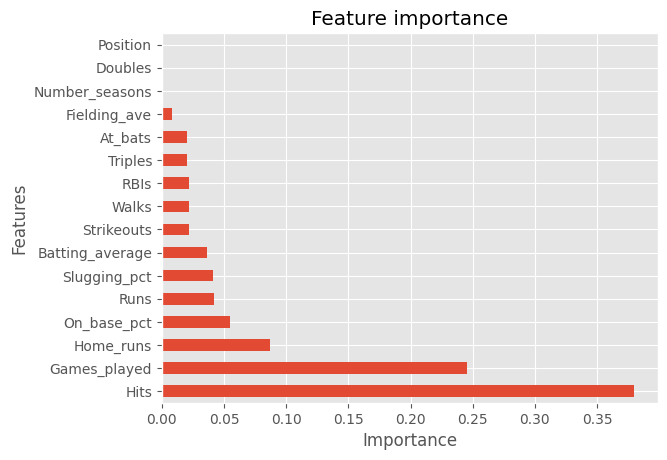

In [37]:
ax = pd.Series(model_smoteenn.feature_importances_, index=X.columns).sort_values(ascending=False).plot.barh()
    
ax.set_xlabel('Importance')
ax.set_ylabel('Features')

plt.title("Feature importance")
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }

In [41]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3) # Po defaultu je cv=5
#estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3, scoring = 'precision') 

In [42]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [43]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [44]:
estimator.best_score_

0.9393034825870646

In [45]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test, estimator.best_estimator_)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.88      0.99      0.93      0.93      0.86       768
          1       0.95      0.88      0.97      0.91      0.93      0.85       888
          2       0.82      0.95      0.89      0.88      0.92      0.85       881

avg / total       0.91      0.90      0.95      0.90      0.93      0.85      2537

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     0    2    1
0  674    0   94
2   11  783   94
1    1   45  835
---------------------------------------------------------------------------------
Classification report for model DecisionTreeCl

In [74]:
estimator.cv_results_

{'mean_fit_time': array([0.00316834, 0.00349267, 0.00451692, 0.00519808, 0.00318384,
        0.00440216, 0.0050532 , 0.00487431]),
 'std_fit_time': array([0.00061352, 0.00070902, 0.00040686, 0.00084931, 0.00024168,
        0.00029151, 0.00043611, 0.00018119]),
 'mean_score_time': array([0.00149695, 0.00116658, 0.00113901, 0.00117723, 0.00133554,
        0.00101693, 0.00084146, 0.00117628]),
 'std_score_time': array([4.06273902e-04, 2.39562707e-04, 1.99476276e-04, 2.54454648e-04,
        4.66082989e-04, 1.49455469e-05, 2.17538834e-04, 2.52768774e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, Y_test, random_forest)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      1.00      0.99      0.99      1.00      0.99       768
          1       0.98      1.00      0.99      0.99      1.00      0.99       888
          2       1.00      0.97      1.00      0.98      0.98      0.97       881

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      2537

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0    2    1
0  766    0    2
2    0  888    0
1   13   14  854
---------------------------------------------------------------------------------
Classification report for model RandomForestCl